# **Exploration and Data Loading**


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlflow.pyfunc.stdin_server import params
from pyarrow import binary


In [2]:
df = pd.read_csv('/Users/anirudhbhagat/PycharmProjects/PythonProject1/data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
pd.set_option('display.max_columns', None)      # show all columns
pd.set_option('display.max_rows', None)         # show all rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe(include = 'all')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

* based on .describe, we'll replace values that have 2 values (binary) to 0 and 1
* those that have values 3 or 4, we'll do One-Hot coding

# **Binary Encoding**


In [6]:
# Binary categorical columns (2 unique values)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Map yes/no and male/female to 0/1
df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0,
                                            'Male': 1, 'Female': 0})
df.head()

/var/folders/yb/mhxp__fx2b39cs29gwyp954r0000gn/T/ipykernel_24414/2984139747.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'Yes': 1, 'No': 0,


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# **One-Hot Coding**

In [7]:
# Categorical problems with > 2 unique values

multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# One-Hot encode
df = pd.get_dummies(df,columns = multi_cat_cols, drop_first = True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,0,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


# **Cleaning**

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df = df.drop('customerID', axis = 1)


In [10]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)   # converts true/false to 1/0 for all boolean cols

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   int64  
 11  Mult

In [12]:
corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


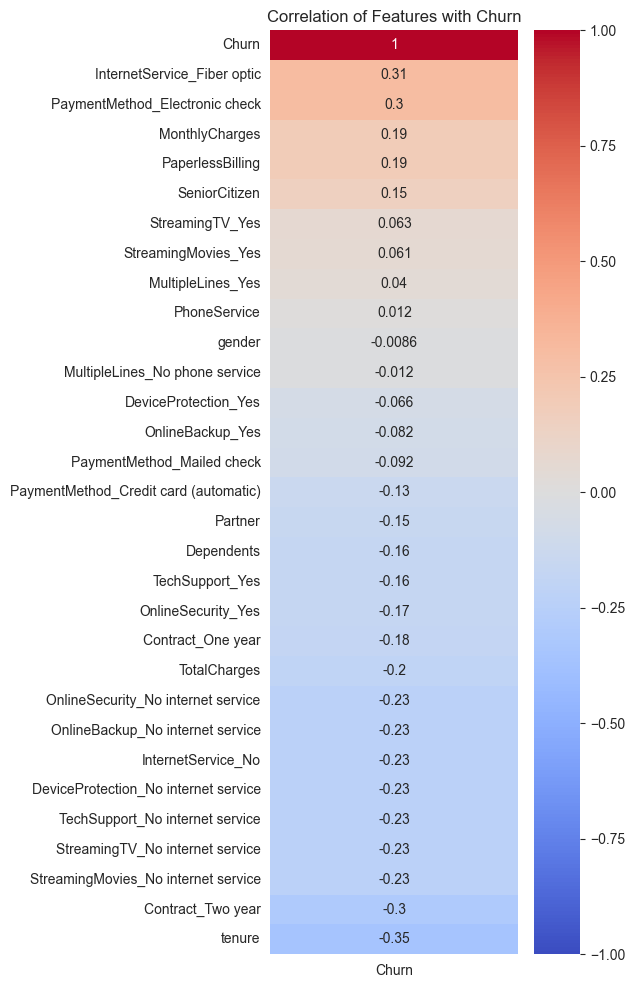

In [13]:
# Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['Churn']].sort_values(by = 'Churn', ascending=False)

# Plot heatmap
plt.figure(figsize=(4,12))
sns.heatmap(churn_corr, annot= True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

#### Negative (lower value --> less likely to churn)
* Tenure (-0.35) --> Customers who stay longer are less likely to churn.
* Contract_Two year (-0.30) --> Customers on long-term contract churn much less
* Contract_One year (-0.18) --> Same trend but weaker than 2-year contract

#### Positive (higher value --> more likely to leave)
* InternetService_Fiber optic(+0.31) --> Fiber optic users churn more in this dataset.
* PaymentMethod_Electronic check (+0.30) --> Customers paying electronically via check churn more.

# **Look for multicolinearity (VIF)**

In [14]:
# We need to collapse redundant columns before running VIF
df['No_InternetService'] = (df['OnlineSecurity_No internet service'] |
                            df['OnlineBackup_No internet service'] |
                            df['DeviceProtection_No internet service'] |
                            df['TechSupport_No internet service'] |
                            df['StreamingTV_No internet service'] |
                            df['StreamingMovies_No internet service']
                            ).astype(int)

# Drop the original redundant dummies
drop_cols = [col for col in df.columns if 'No internet serivce' in col]
df.drop(columns=drop_cols)

# Handle PhoneService redundancy
if 'Multiplelines_No Phone service' in df.columns:
    df['No_phone_service'] = df['Multiplelines_No Phone service']. astype(int)
    df = df.drop(columns=['Multiplelines_No Phone service'])


In [15]:
# Prepare X
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [16]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


                                 features          VIF
15       OnlineBackup_No internet service          inf
12                     InternetService_No          inf
23    StreamingMovies_No internet service          inf
21        StreamingTV_No internet service          inf
19        TechSupport_No internet service          inf
17   DeviceProtection_No internet service          inf
13     OnlineSecurity_No internet service          inf
30                     No_InternetService          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
11            InternetService_Fiber optic   148.500814
9          MultipleLines_No phone service    60.842267
24                    StreamingMovies_Yes    24.156394
22                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
10                      MultipleLines_Yes     7.289761
18        

/Users/anirudhbhagat/Desktop/AI-ML/Projects/ML Churn Model/.venv/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


* Clearly we can see there's multicolinearity between features
* So either we need to drop some features or use regularization techniques like Lasso or Ridge regression to handle this
* Or use tree based models which are less sensitive to multicolinearity
* In decision tress, splits are based on feature importance for reducing impurity - redundant features just compete, but won't cause unstable prediction

# Machine Learning

In [17]:
# We have a class imbalance problem
# Given your imbalance (27% churners), class weighting + threshold tuning is probably enough -  no need for aggressive  oversampling yet
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In churn prediction, recall (and metrics derived from it, like F1) is usually the most important - here' why:

Business context Churn prediction is asymmetric in cost:
* False Negative (FN): You predict the customer will not churn, but they actually leave -> you miss the chance to intervene and akeep them
* False Positive (FP): You predict the customer will churn, but they stay -> you might spent some retention resources unnecessarily
* Missing churners (FN) usually cost more than wrongly targeting a loyal customer.

Typical priority
* If retention campaigns are cheap -> prioritize recall (catch every possible churner)
* If retention campaigns are expensive -> balance precision and recall using F1 score or a precision recall trade-off
* If business wants a ranking of churn risk -> use ROC-AUC or PR_AUC to evaluate the mdoel

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

THRESHOLD = 0.3     # lower than 0.5 to boost recall (see next to choose the right value)


# RandomForest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(n_estimators = 300,
                            class_weight = 'balanced', # handles imbalance for you
                            random_state = 42, n_jobs = -1)

rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:,1]
y_pred = (proba > THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      0.886     0.768     0.823      1035
           1      0.531     0.727     0.614       374

    accuracy                          0.757      1409
   macro avg      0.709     0.748     0.718      1409
weighted avg      0.792     0.757     0.768      1409



In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:,1]

print("Threshold tuning for RandomForest")

print(f"{'Threshold':<8} {'Prec_1':<8}{'Rec_1':<8}{'F1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label = 1)
    rec = recall_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)
    print(f"{thresh:<8}  {prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Threshold Prec_1  Rec_1   F1      
0.25      0.511   0.794   0.622   
0.3       0.532   0.733   0.616   
0.35      0.540   0.660   0.594   
0.4       0.571   0.615   0.592   
0.45      0.601   0.543   0.570   
0.5       0.630   0.487   0.549   


--> you're now catching 73.3% of actual churners with RandomForest

# LightGBM classifier

In [22]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(n_estimators = 500,
                      learning_rate = 0.05,
                      class_weight = 'balanced',
                      random_state = 42,
                      n_jobs = -1
                      )

#Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits = 3))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Training time: 2.01 seconds
Prediction time: 0.0057 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.733   

--> You're now catching 81.8% of actual churners with LightGBM (improvement)
* The cost is a small drop in precision - meaning more loyal customers will be flagged as churn risks -- but if retension offers are low cost, this is fine

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:,1]

print((f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}"))
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label = 1)
    rec = recall_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Thresh  Prec_1  Rec_1   F1_1    
0.25    0.479   0.842   0.610   
0.3     0.498   0.818   0.619   
0.35    0.507   0.786   0.616   
0.4     0.524   0.757   0.619   
0.45    0.537   0.741   0.622   
0.5     0.552   0.701   0.617   


# XGBoost Classifier

In [24]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier( n_estimators = 500,
                     learning_rate = 0.05,
                     max_depth = 6,
                     subsample = 0.8,
                     colsample_bytree = 0.8,
                     random_state = 42,
                     n_jobs = -1,
                     scale_pos_weight = scale_pos_weight,
                     eval_metric = 'logloss'
                    )

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits = 3))


Training time: 0.81 seconds
Prediction time: 0.0051 seconds
              precision    recall  f1-score   support

           0      0.910     0.688     0.784      1035
           1      0.485     0.813     0.607       374

    accuracy                          0.721      1409
   macro avg      0.698     0.750     0.696      1409
weighted avg      0.798     0.721     0.737      1409



In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:,1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label = 1)
    rec = recall_score(y_test, preds, pos_label = 1)
    f1 = f1_score(y_test, preds, pos_label = 1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.466   0.826   0.596   
0.3     0.485   0.813   0.607   
0.35    0.505   0.781   0.613   
0.4     0.520   0.757   0.617   
0.45    0.535   0.743   0.622   
0.5     0.553   0.701   0.618   


### ML model choice XGBoost
* Gives a decent recall (same as LightGBM)
* AND faster to train (3x faster)

# Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFLow)

In [27]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {"n_estimators": trial.suggest_int("n_estimators", 300, 800),
              "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
              "max_depth": trial.suggest_int("max_depth", 3, 10),
              "subsample": trial.suggest_float("subsample", 0.5, 1.0),
              "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
              "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
              "gamma": trial.suggest_float("gamma", 0, 5),
              "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
              "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
              "random_state":42,
              "n_jobs": -1,
              "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
              "eval_metric": "logloss"
              }
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:,1]
    y_pred = (proba >= THRESHOLD).astype(int)   # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label = 1)     # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials = 30)

print("Best Parameters:", study.best_params)
print("Best Recall:", study.best_value)


/Users/anirudhbhagat/Desktop/AI-ML/Projects/ML Churn Model/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-10-14 23:37:45,937] A new study created in memory with name: no-name-1df3c058-ac96-4f8c-8bce-a0b7dd33686d
[I 2025-10-14 23:37:46,174] Trial 0 finished with value: 0.8903743315508021 and parameters: {'n_estimators': 490, 'learning_rate': 0.15457699755060128, 'max_depth': 7, 'subsample': 0.7710944546775096, 'colsample_bytree': 0.6586450600660991, 'min_child_weight': 9.766768589635682, 'gamma': 3.7862421486209774, 'reg_alpha': 1.0299475604537778, 'reg_lambda': 0.36843127644537843}. Best is trial 0 with value: 0.8903743315508021.
[I 2025-10-14 23:37:46,514] Trial 1 finished with value: 0.8663101604278075 and parameters: {'n_estimators': 559, 'learning_rate': 0.1762892369209259, 'max_depth

Best Parameters: {'n_estimators': 760, 'learning_rate': 0.058347765596730376, 'max_depth': 9, 'subsample': 0.9964503286008723, 'colsample_bytree': 0.6453507829651648, 'min_child_weight': 9.202451340485716, 'gamma': 4.318118447000789, 'reg_alpha': 3.1222851907502953, 'reg_lambda': 0.4148383392914744}
Best Recall: 0.9197860962566845


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({"random_state": 42,
                   "n_jobs":-1,
                    "scale_pos_weight": scale_pos_weight,
                    "eval_metric": "logloss"
                    }
                   )

# Create model for best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:,1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits = 3))


Training time: 0.30 seconds
Prediction time: 0.0018 seconds
              precision    recall  f1-score   support

           0      0.952     0.572     0.715      1035
           1      0.437     0.920     0.593       374

    accuracy                          0.664      1409
   macro avg      0.694     0.746     0.654      1409
weighted avg      0.815     0.664     0.682      1409

